In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from IPython.display import display, clear_output
from py_src.net import get_model

2024-04-26 18:56:26.306573: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 18:56:26.351921: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 18:56:26.352611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 18:56:27.018241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
INPUT_WIDTH = 256
INPUT_HEIGHT = 256
CHANNELS = 3
OUTPUT_WIDTH = 16
WEIGHTS_HEIGHT = 31744
WEIGHTS_WIDTH = 16

train_dir = "./dataset/cats_and_dogs_256x256/train/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(INPUT_WIDTH, INPUT_HEIGHT),
    batch_size=1,
    class_mode='binary',
)

model = get_model()
print("Loading model")
model.load_weights("./model/cats_dogs_net.h5")
print("Model loaded")

Found 9892 images belonging to 2 classes.
Loading model
Model loaded


2024-04-26 18:56:28.252286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 18:56:28.255124: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


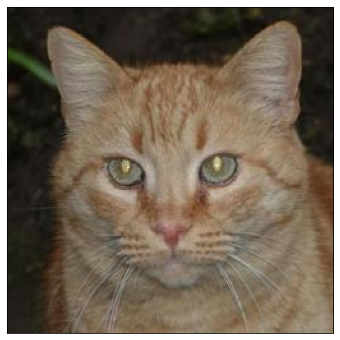

Image 1 of 10
Classified as: CAT,	expected: CAT
FPS: 17.492634774920344


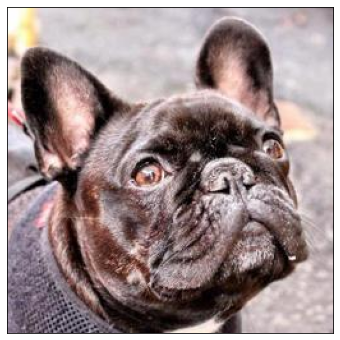

Image 2 of 10
Classified as: DOG,	expected: DOG
FPS: 19.801741992654907


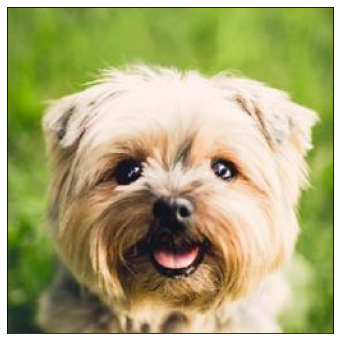

Image 3 of 10
Classified as: DOG,	expected: DOG
FPS: 21.13415469274018


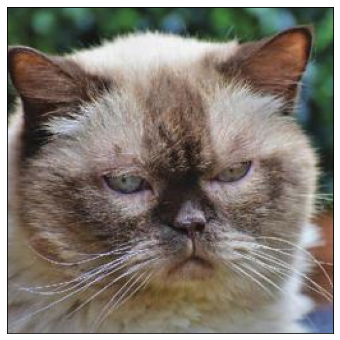

Image 4 of 10
Classified as: CAT,	expected: CAT
FPS: 21.224189034598986


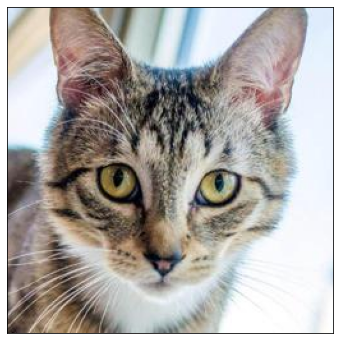

Image 5 of 10
Classified as: CAT,	expected: CAT
FPS: 21.94970093951698


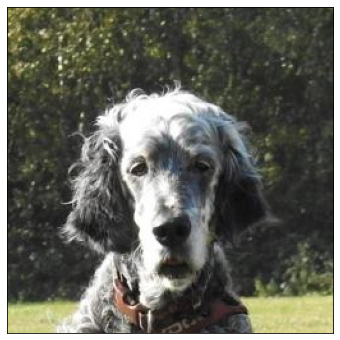

Image 6 of 10
Classified as: DOG,	expected: DOG
FPS: 20.971187956190693


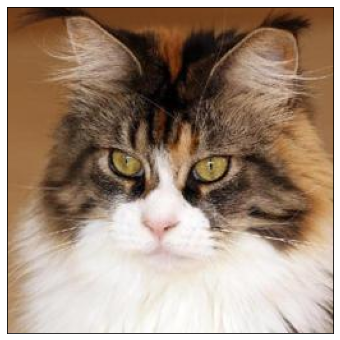

Image 7 of 10
Classified as: CAT,	expected: CAT
FPS: 21.44274425166927


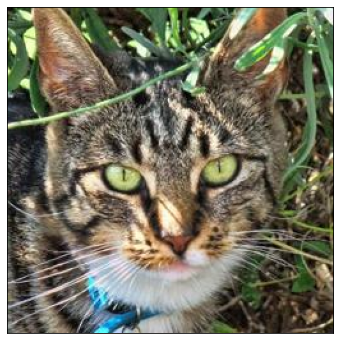

Image 8 of 10
Classified as: CAT,	expected: CAT
FPS: 20.673865559433583


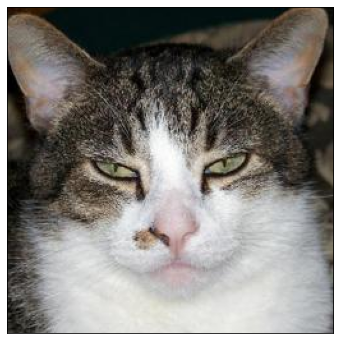

Image 9 of 10
Classified as: CAT,	expected: CAT
FPS: 19.864508203757477


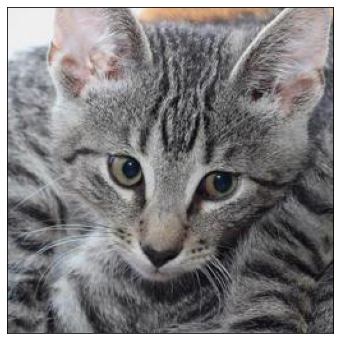

Image 10 of 10
Classified as: CAT,	expected: CAT
FPS: 20.537175845187488

Accuracy: 100.0 %


In [3]:
MAX_ITERATIONS = 10
CLEAR_OUTPUT = False # set to True for larger number of iterations
fig, ax = plt.subplots(figsize=(6, 6))
accuracy = 0
for (sample, expected_class), i in zip(train_generator, range(MAX_ITERATIONS)):
    ax.clear()
    ax.imshow(sample[0] * (1/255))
    ax.set_yticks([])
    ax.set_xticks([])
    if CLEAR_OUTPUT:
        clear_output(wait=True)
        display(fig)
    else:
        plt.show()
        fig, ax = plt.subplots(figsize=(6, 6))

    counter = 0
    start = time.time()
    while start + 2 > time.time():
        prediction = model.predict(sample, verbose=0)
        counter += 1

    time_taken = time.time() - start
    classified = "DOG" if prediction[0, 0] >= 0.5 else "CAT"
    expected_class = "DOG" if expected_class[0] >= 0.5 else "CAT"
    print(f"Image {i + 1} of {MAX_ITERATIONS}")
    print(f"Classified as: {classified},\texpected: {expected_class}")
    print(f"FPS: {counter / time_taken}") # # the last run of the inference was performed on: Intel(R) Core(TM) i5-4670K CPU @ 3.40GHz
    accuracy += classified == expected_class
    if CLEAR_OUTPUT:
        time.sleep(1.5)

plt.clf()
plt.close()
print(f"\nAccuracy: {accuracy / MAX_ITERATIONS * 100} %")